## Log-Normal distribution

Here I demonstrate how by extracting values from a Gaussian distribution and taking the exponential the distribution changes into a lognormal distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

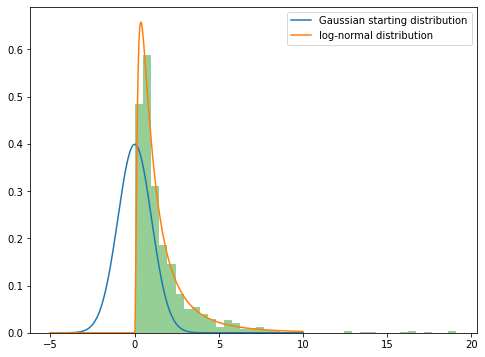

In [2]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

x = np.linspace(-5,10,1000)
y = norm(loc=0, scale=1).pdf(x)
x1 = norm(loc=0, scale=1).rvs(1000)
y1 = np.exp(x1)

plt.plot(x,y, label='Gaussian starting distribution')
plt.plot(x, lognorm(1).pdf(np.linspace(-5,10,1000)), label='log-normal distribution') #lognorm(s) where s=sigma of the gaussian
plt.hist(y1, bins=40, density=True, alpha=0.5)
plt.legend()

In blue the Gaussian distribution from which I generate random numbers, in green the distribution of the exponential of the generated numbers and in orange a lognormal distribution to compare.

## Student's t distribution


Let's now try to demonstrate that given a sample of N measurements, ${x_{i}}$, drawn from a Gaussian distribution $\mathcal{N}(\mu, \sigma)$, the quantity 
$$t = \frac{\bar{x}-\mu}{s/\sqrt{N}}$$
follows a Student's t distribution.

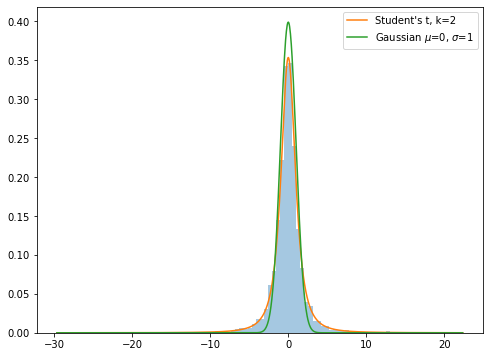

In [3]:
from scipy.stats import t
fig, ax = plt.subplots(1,1, figsize = (8,6))

N_times = 3000
gauss = []
t_var = []

#Here i extract 3000 times a sample of 3 elements from a gaussian and evaluate the t value
np.random.seed(28)
for i in range(N_times):
    gauss.append(norm(loc=0, scale=2).rvs(3)) 
    mean = np.mean(gauss[i]) #sample mean
    std = np.std(gauss[i], ddof=1) #sample std
    t_var.append(mean/(std/np.sqrt(3))) #t
    
ax.hist(t_var, density=True, bins = 100, alpha=0.4)
ax.plot(np.linspace(np.min(t_var), np.max(t_var), 1000), t(2).pdf(np.linspace(np.min(t_var), np.max(t_var), 1000)), label="Student's t, k=2")
ax.plot(np.linspace(np.min(t_var), np.max(t_var), 1000), norm(loc=0, scale=1).pdf(np.linspace(np.min(t_var), np.max(t_var), 1000)), label='Gaussian $\mu$=0, $\sigma$=1')
ax.legend()

It's clear how the orange line (Student's t) is way more suited to describe these data than a Gaussian, even if for high number of extractions per sample the Student's t distribution approaches a Normal distribution.